In [2]:
# Show plots inline, and load main getdist plot module and samples class

import os
import sys
import getdist
import IPython
import matplotlib
import matplotlib.pyplot as plt
from getdist import loadMCSamples,MCSamples, plots
import numpy as np
import getdist_chainplot_utils as gdu

## Sample MCSamples testing

In [3]:
ndim = 4
nsamp = 10000
random_state = np.random.default_rng(10)  # seed random generator
A = random_state.random((ndim, ndim))
cov = np.dot(A, A.T)
samps = random_state.multivariate_normal([0] * ndim, cov, size=nsamp)
A = random_state.random((ndim, ndim))
cov = np.dot(A, A.T)
samps2 = random_state.multivariate_normal([0] * ndim, cov, size=nsamp)

In [4]:
# Get the getdist MCSamples objects for the samples, specifying same parameter
# names and labels; if not specified weights are assumed to all be unity
names = ["x%s" % i for i in range(ndim)]
labels = ["x_%s" % i for i in range(ndim)]
samples = MCSamples(samples=samps, names=names, labels=labels,label="First set")
samples2 = MCSamples(samples=samps2, names=names, labels=labels, label="Second set")

Removed no burn in
Removed no burn in


In [5]:
samples[labels]

['x_0', 'x_1', 'x_2', 'x_3']

In [6]:
samples["x1"]

array([-0.660573  ,  0.58380173, -0.3238681 , ...,  1.3778459 ,
       -1.1352036 ,  0.94308114])

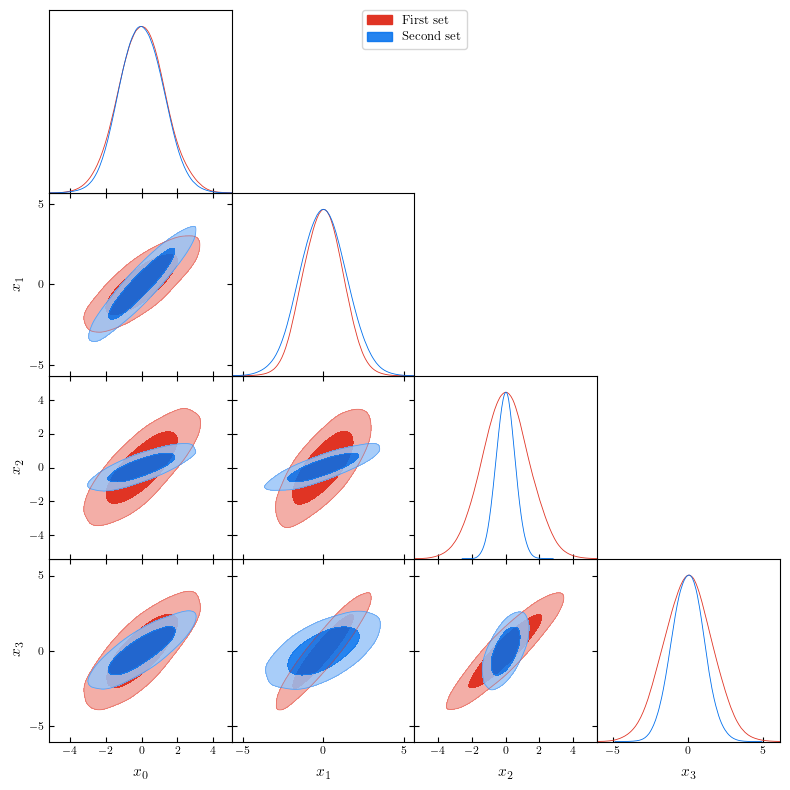

In [7]:
# Triangle plot (sometimes also called a corner plot)
g = plots.get_subplot_plotter()
g.triangle_plot([samples, samples2], filled=True)

## using MCMC chain from Y3

In [8]:
test_chain = gdu.prep_chain("chain...d3_l_nla_realy3dat.txt","d3_l_nla_realy3dat")

...getting data from  chain...d3_l_nla_realy3dat.txt
... removing rows with NaNs (number of rows = 0)
19956
...adding chain for d3_l_nla_realy3dat , samples have shape (19956, 38)
isIS=False
isNautilus= False
Removed no burn in


In [9]:
test_chain

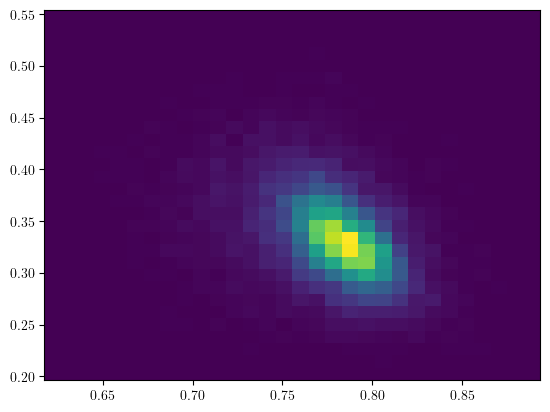

In [10]:
plt.hist2d(test_chain["S8"],test_chain["cosmological_parameters--omega_m"],bins=30);

Text(0.5, 0, '$S_{8}$')

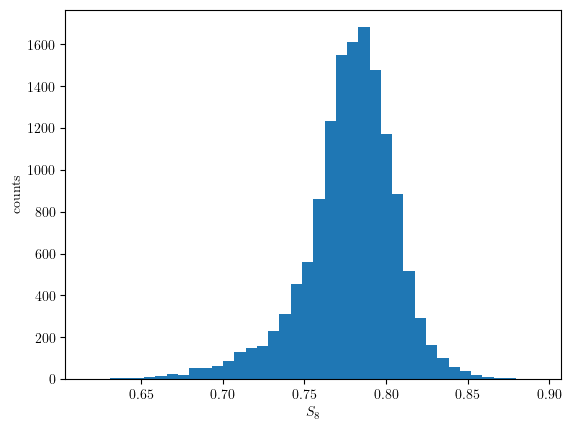

In [11]:
plt.hist(test_chain["S8"],bins=40)
plt.ylabel('counts')
plt.xlabel('$S_{8}$')

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
/var/folders/7b/f0v53vps6qdb73l50cs7g1d40000gn/T/ipykernel_77384/2787780022.py:3: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('$\Omega_{m}$')


Text(0.5, 0, '$\\Omega_{m}$')

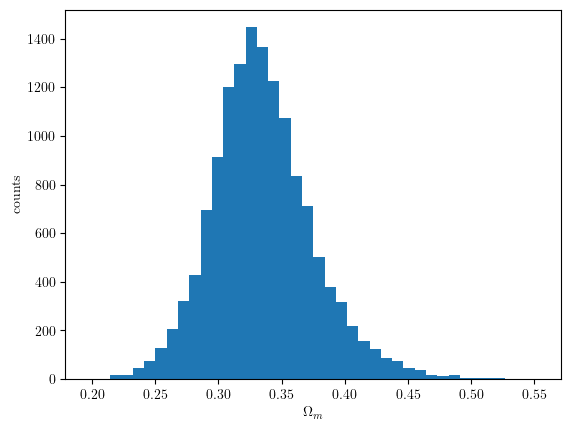

In [12]:
plt.hist(test_chain["cosmological_parameters--omega_m"],bins=40,label="$Histogram of $Omega_{m}$")
plt.ylabel('counts')
plt.xlabel('$\Omega_{m}$')

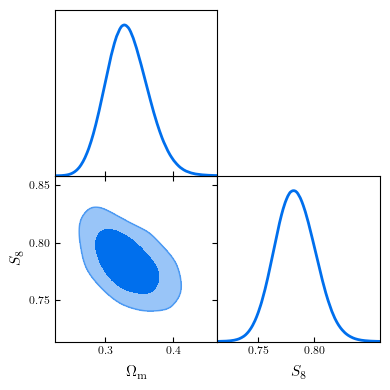

In [13]:
plot =plots.get_subplot_plotter()
plot.triangle_plot(test_chain, ["cosmological_parameters--omega_m", "S8"], filled=True, contour_lws=2)

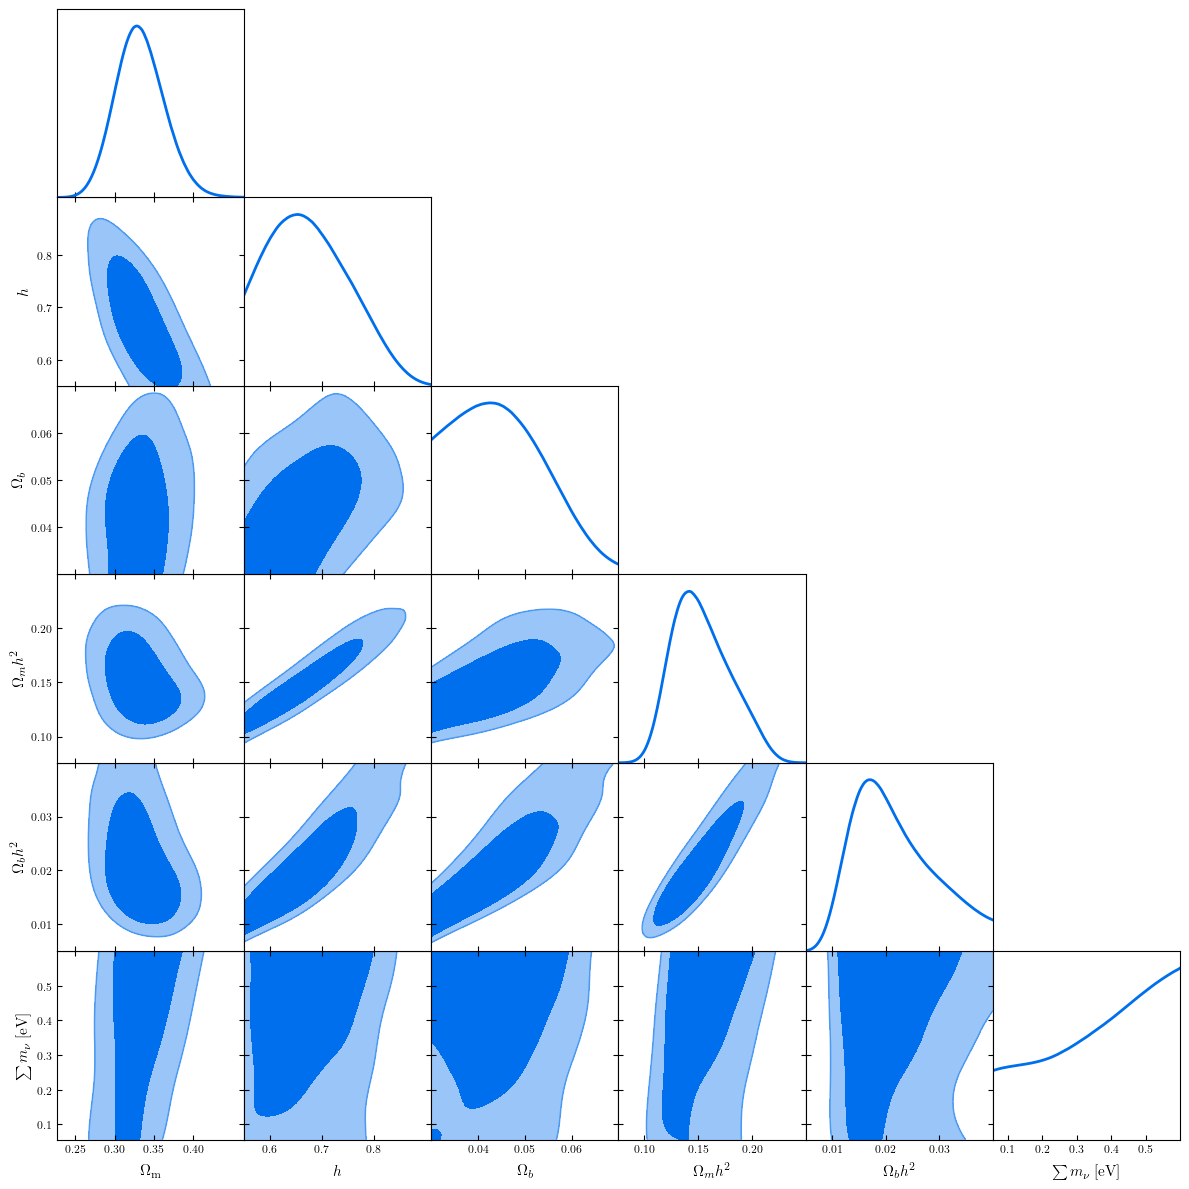

In [14]:
plot.triangle_plot(test_chain,["cosmological_parameters--omega_m","cosmological_parameters--h0","cosmological_parameters--omega_b","cosmological_parameters--ommh2","cosmological_parameters--ombh2","summnu"], filled=True, contour_lws=2)